In [2]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import rasterio
import os

In [3]:
def read_method(method:str=''):
    if method == 'Image' or method == '':
        return Image.open
    if method == 'rasterio':
        return rasterio.open
    if method == 'numpy':
        return np.load


def image_normalize(im, axis = (0,1), c = 1e-8):
    return (im - im.mean(axis)) / (im.std(axis) + c)

In [4]:
data_dir = "/home/winter/code-resource/treeseg/trainingdata"

(255, 256)
[0 1]
[0 1]


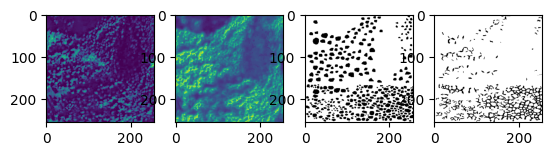

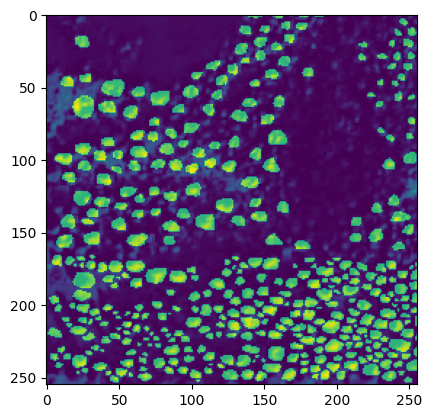

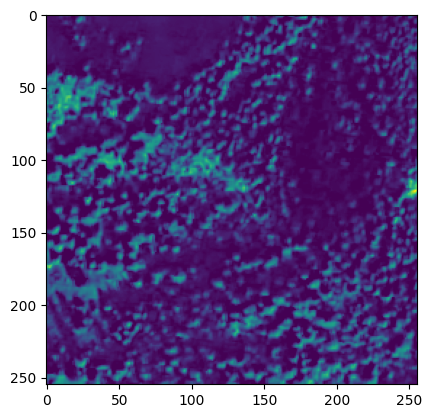

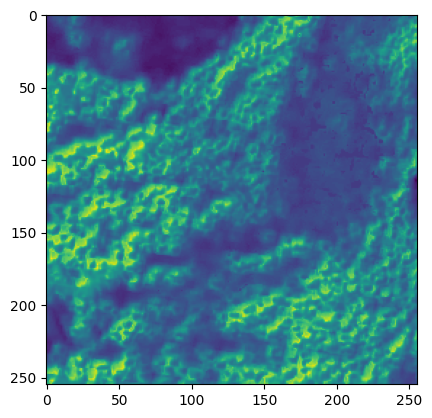

In [72]:
# check interm png
interm_png = 'interm_png'
v = 1
a = 150
pattern = '{}-{}-area{}.png'
pan = read_method('rasterio')(f"{data_dir}/{interm_png}/{pattern.format('pan',v,a)}").read(1)
ndvi = read_method('rasterio')(f"{data_dir}/{interm_png}/{pattern.format('ndvi',v,a)}").read(1)
anno = read_method('rasterio')(f"{data_dir}/{interm_png}/{pattern.format('annotation',v,a)}").read(1)
boundary = read_method('rasterio')(f"{data_dir}/{interm_png}/{pattern.format('boundary',v,a)}").read(1)

print(pan.shape)
print(np.unique(anno))
print(np.unique(boundary))

fig = plt.figure()
fig.add_subplot(1,4,1)
plt.imshow(pan)
fig.add_subplot(1,4,2)
plt.imshow(ndvi)
fig.add_subplot(1,4,3)
plt.imshow(anno,cmap='binary')
fig.add_subplot(1,4,4)
plt.imshow(boundary,cmap='binary')
plt.show()

fig2 = plt.figure()
max_v = np.max(pan)
plt.imshow(pan+anno*max_v)
plt.show()

fig3 = plt.figure()
plt.imshow(pan)
plt.show()

fig4 = plt.figure()
plt.imshow(ndvi)
plt.show()